# Churn Biblioteca

## Importando bibliotecas

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')


from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

import graphviz


pd.set_option('display.max_columns', 25)

In [118]:
SEED = 5464

## Importando dados

In [79]:
churn_biblioteca = pd.read_csv('/home/franciscofoz/Documents/GitHub/machine-learning-training/Datasets/churn_biblioteca.csv',sep=';')
churn_biblioteca

,nivel_matricula,institutos,visitou_biblioteca,visitou_biblioteca_digital,visitou_evento,consultou_biblioteca,nota_emprestimo,nota_evento,nota_infraestrutura,nota_acervo,nota_redes_sociais,churn
0,Graduação,Química,0,1,1,0,3.0,1.0,2.0,4.0,0.0,sim
1,Graduação,Estudos da Linguagem,0,1,1,1,1.0,1.0,2.0,5.0,4.0,sim
2,Docência,Economia,0,0,1,0,1.0,2.0,2.0,1.0,0.0,sim
3,Pós-graduação,Química,1,0,0,1,3.0,1.0,3.0,5.0,3.0,sim
4,Graduação,Artes,0,0,0,1,4.0,1.0,2.0,5.0,2.0,sim
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,Graduação,Economia,1,0,0,1,1.0,2.0,1.0,5.0,1.0,não
17996,Pós-graduação,Física,1,0,1,0,4.0,2.0,5.0,5.0,2.0,não
17997,Pós-graduação,Química,1,0,1,1,2.0,3.0,5.0,4.0,4.0,não
17998,Pós-graduação,"Matemática, Estatística e Computação Científica",0,0,1,0,4.0,4.0,4.0,5.0,5.0,não


## Análise exploratória

In [80]:
churn_biblioteca.churn.value_counts(normalize=True)

churn
não    0.93
sim    0.07
Name: proportion, dtype: float64

In [81]:
churn_biblioteca_sim = churn_biblioteca.query('churn == "sim"')
churn_biblioteca_nao = churn_biblioteca.query('churn == "não"')

In [82]:
def tabela_freq(variavel):
    
    freq_percent = churn_biblioteca[variavel].value_counts(normalize=True).round(2).reset_index()
    freq_percent.columns = [variavel,'percentual']
    return freq_percent

### Nível Matrícula

In [83]:
churn_biblioteca.nivel_matricula.value_counts(normalize=True).round(2)

nivel_matricula
Graduação        0.45
Pós-graduação    0.45
Docência         0.11
Name: proportion, dtype: float64

In [84]:
churn_biblioteca_sim.nivel_matricula.value_counts(normalize=True).round(2)

nivel_matricula
Graduação        0.45
Pós-graduação    0.44
Docência         0.11
Name: proportion, dtype: float64

In [85]:
churn_biblioteca_nao.nivel_matricula.value_counts(normalize=True).round(2)

nivel_matricula
Graduação        0.45
Pós-graduação    0.45
Docência         0.10
Name: proportion, dtype: float64

In [86]:
churn_biblioteca.columns

Index(['nivel_matricula', 'institutos', 'visitou_biblioteca',
       'visitou_biblioteca_digital', 'visitou_evento', 'consultou_biblioteca',
       'nota_emprestimo', 'nota_evento', 'nota_infraestrutura', 'nota_acervo',
       'nota_redes_sociais', 'churn'],
      dtype='object')

In [87]:
churn_biblioteca_notas = churn_biblioteca.iloc[:,7:12]
churn_biblioteca_notas.describe().loc[['mean','std']].round(2)

,nota_evento,nota_infraestrutura,nota_acervo,nota_redes_sociais
mean,2.47,3.21,3.75,2.06
std,1.03,1.35,1.24,1.63


In [88]:
tabela_freq('nota_emprestimo')

,nota_emprestimo,percentual
0,3.0,0.27
1,2.0,0.22
2,4.0,0.21
3,5.0,0.15
4,1.0,0.11
5,0.0,0.05


## ML

### Transformação dos dados

In [89]:
churn_biblioteca_modificado = churn_biblioteca.copy()

traducao_dic = {'sim' : 1, 'não': 0}
churn_biblioteca_modificado[['churn']] = churn_biblioteca_modificado[['churn']].replace(traducao_dic)

In [90]:
churn_biblioteca_modificado

,nivel_matricula,institutos,visitou_biblioteca,visitou_biblioteca_digital,visitou_evento,consultou_biblioteca,nota_emprestimo,nota_evento,nota_infraestrutura,nota_acervo,nota_redes_sociais,churn
0,Graduação,Química,0,1,1,0,3.0,1.0,2.0,4.0,0.0,1
1,Graduação,Estudos da Linguagem,0,1,1,1,1.0,1.0,2.0,5.0,4.0,1
2,Docência,Economia,0,0,1,0,1.0,2.0,2.0,1.0,0.0,1
3,Pós-graduação,Química,1,0,0,1,3.0,1.0,3.0,5.0,3.0,1
4,Graduação,Artes,0,0,0,1,4.0,1.0,2.0,5.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,Graduação,Economia,1,0,0,1,1.0,2.0,1.0,5.0,1.0,0
17996,Pós-graduação,Física,1,0,1,0,4.0,2.0,5.0,5.0,2.0,0
17997,Pós-graduação,Química,1,0,1,1,2.0,3.0,5.0,4.0,4.0,0
17998,Pós-graduação,"Matemática, Estatística e Computação Científica",0,0,1,0,4.0,4.0,4.0,5.0,5.0,0


In [91]:
churn_biblioteca_modificado = pd.get_dummies(churn_biblioteca_modificado)
churn_biblioteca_modificado

,visitou_biblioteca,visitou_biblioteca_digital,visitou_evento,consultou_biblioteca,nota_emprestimo,nota_evento,nota_infraestrutura,nota_acervo,nota_redes_sociais,churn,nivel_matricula_Docência,nivel_matricula_Graduação,nivel_matricula_Pós-graduação,institutos_Artes,institutos_Biologia,institutos_Computação,institutos_Economia,institutos_Estudos da Linguagem,institutos_Filosofia e Ciências Humanas,institutos_Física,institutos_Geociências,"institutos_Matemática, Estatística e Computação Científica",institutos_Química
0,0,1,1,0,3.0,1.0,2.0,4.0,0.0,1,False,True,False,False,False,False,False,False,False,False,False,False,True
1,0,1,1,1,1.0,1.0,2.0,5.0,4.0,1,False,True,False,False,False,False,False,True,False,False,False,False,False
2,0,0,1,0,1.0,2.0,2.0,1.0,0.0,1,True,False,False,False,False,False,True,False,False,False,False,False,False
3,1,0,0,1,3.0,1.0,3.0,5.0,3.0,1,False,False,True,False,False,False,False,False,False,False,False,False,True
4,0,0,0,1,4.0,1.0,2.0,5.0,2.0,1,False,True,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,0,0,1,1.0,2.0,1.0,5.0,1.0,0,False,True,False,False,False,False,True,False,False,False,False,False,False
17996,1,0,1,0,4.0,2.0,5.0,5.0,2.0,0,False,False,True,False,False,False,False,False,False,True,False,False,False
17997,1,0,1,1,2.0,3.0,5.0,4.0,4.0,0,False,False,True,False,False,False,False,False,False,False,False,False,True
17998,0,0,1,0,4.0,4.0,4.0,5.0,5.0,0,False,False,True,False,False,False,False,False,False,False,False,True,False


### Balanceamento de dados

In [92]:
churn_biblioteca_modificado.churn.value_counts(normalize=True)

churn
0    0.93
1    0.07
Name: proportion, dtype: float64

In [93]:
churn_biblioteca_modificado.shape

(18000, 23)

In [94]:
X = churn_biblioteca_modificado.drop('churn', axis = 1)
y = churn_biblioteca_modificado['churn']

In [95]:
smt = SMOTE(random_state=65486)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [96]:
churn_biblioteca_balanceado = pd.concat([X, y], axis=1)

In [97]:
churn_biblioteca_balanceado.churn.value_counts(normalize=True)

churn
1    0.5
0    0.5
Name: proportion, dtype: float64

In [98]:
churn_biblioteca_balanceado.shape

(33480, 23)

## Divisão de treino e teste


In [99]:
X = churn_biblioteca_balanceado.drop('churn', axis = 1)
y = churn_biblioteca_balanceado['churn']

In [100]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2,random_state=6468)

## Modelos


In [101]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_treino,y_treino)
predito_knn = knn.predict(X_teste)
y_pred_knn = knn.predict_proba(X_teste)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_teste, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [102]:
bnb = BernoulliNB(binarize=np.median(X_treino))
bnb.fit(X_treino,y_treino)
predito_bnb = bnb.predict(X_teste)
y_pred_bnb = bnb.predict_proba(X_teste)[:,1]
fpr_bnb, tpr_bnb, _ = roc_curve(y_teste, y_pred_bnb)
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)

In [103]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=351)
dtc.fit(X_treino,y_treino)
predito_arvore_decisao = dtc.predict(X_teste)
y_pred_dtc = dtc.predict_proba(X_teste)[:,1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_teste, y_pred_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

In [104]:
svc = SVC()
svc.fit(X_treino,y_treino)
predito_svc = svc.predict(X_teste)
y_pred_svc = dtc.predict_proba(X_teste)[:,1]
fpr_svc, tpr_svc, _ = roc_curve(y_teste, y_pred_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

In [105]:
dummy = DummyClassifier(strategy="uniform")
dummy.fit(X_treino,y_treino)
predito_dummy = dummy.predict(X_teste)
y_pred_dummy = dummy.predict_proba(X_teste)[:,1]
fpr_dummy, tpr_dummy, _ = roc_curve(y_teste, y_pred_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

In [106]:
def metricas_classificao(nome_modelo,predicao,auc):

  metricas = classification_report(y_teste, predicao,output_dict=True)
  metricas = pd.DataFrame(metricas)
  df_metricas = pd.DataFrame({'AUC': auc,
                              'Acurácia' :  [metricas.iloc[0,2]],
                              'F1-score_1': [metricas.iloc[2,1]],
                              'Precisão':   [metricas.iloc[0,1]],
                              'Revocação':     [metricas.iloc[1,1]]},
                              index=[nome_modelo])
  
  return df_metricas

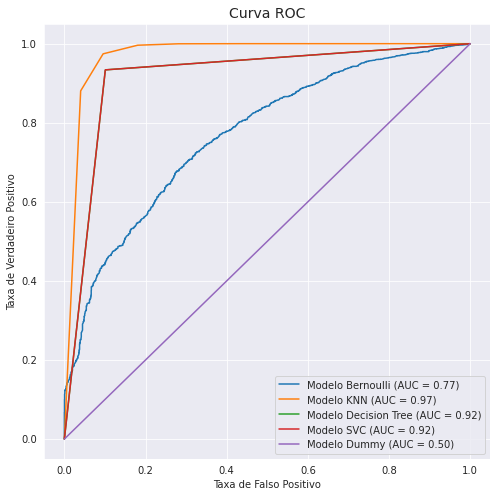

In [107]:
plt.figure(figsize=(8,8))
plt.plot(fpr_bnb, tpr_bnb, label='Modelo Bernoulli (AUC = %0.2f)' % roc_auc_bnb)
plt.plot(fpr_knn, tpr_knn, label='Modelo KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dtc, tpr_dtc, label='Modelo Decision Tree (AUC = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_svc, tpr_svc, label='Modelo SVC (AUC = %0.2f)' % roc_auc_svc)
plt.plot(fpr_dummy, tpr_dummy, label='Modelo Dummy (AUC = %0.2f)' % roc_auc_dummy)

plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC',size=14)
plt.legend(loc="lower right")


In [108]:
metricas_BNB = metricas_classificao('Modelo Bernoulli de Naive Bayes',predito_bnb,roc_auc_bnb).round(3)
metricas_knn = metricas_classificao('Modelo KNN',predito_knn,roc_auc_knn).round(3)
metricas_dtc = metricas_classificao('Modelo Árvore de Decisão',predito_arvore_decisao,roc_auc_dtc).round(3)
metricas_svc = metricas_classificao('Modelo SVC',predito_svc,roc_auc_svc).round(3)
metricas_dummy = metricas_classificao('Modelo Dummy',predito_dummy,roc_auc_dummy).round(3)

metricas_modelos = pd.concat([metricas_BNB,metricas_knn,metricas_dtc,metricas_svc,metricas_dummy])


In [109]:
metricas_modelos.sort_values(by='F1-score_1',ascending=False)

,AUC,Acurácia,F1-score_1,Precisão,Revocação
Modelo Árvore de Decisão,0.916,0.917,0.919,0.904,0.934
Modelo KNN,0.972,0.909,0.917,0.849,0.996
Modelo SVC,0.916,0.842,0.822,0.955,0.722
Modelo Bernoulli de Naive Bayes,0.769,0.699,0.700,0.706,0.693
Modelo Dummy,0.500,0.509,0.505,0.515,0.496


In [119]:
def imprime_resultados(results):
    metricas = ['roc_auc', 'accuracy', 'f1', 'precision', 'recall']

    for metrica in metricas:
        media_resultados = results[f'test_{metrica}'].mean().round(2)
        desvio_padrao_resultados = results[f'test_{metrica}'].std()
        min_resultados = round((media_resultados - (2 * desvio_padrao_resultados)) * 100, 2)
        max_resultados = round((media_resultados + (2 * desvio_padrao_resultados)) * 100, 2)
        variacao_do_intervalo = round(max_resultados - min_resultados, 2)

        print(f'--> {metrica}')
        print(f'\tMédia: {media_resultados * 100}')
        print(f'\tMin: {min_resultados}\n\tMax: {max_resultados}')
        print(f'\tVariação do intervalo = {variacao_do_intervalo}')

In [121]:
churn_biblioteca_balanceado = churn_biblioteca_balanceado.sample(frac=1).reset_index(drop=1)

X = churn_biblioteca_balanceado.drop('churn', axis=1)
Y = churn_biblioteca_balanceado['churn']

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=SEED)

scoring = ['roc_auc', 'accuracy', 'f1', 'precision', 'recall']

print(10*'+-', 'DUMMY CLASSIFIER', 10*'-+')
dummy = DummyClassifier(strategy="uniform")
results = cross_validate(dummy, X, Y, cv=cv, return_train_score=False, scoring=scoring)
imprime_resultados(results)
print(60*'-')

print('\n', 10*'+-', 'DECISION TREE CLASSIFIER', 10*'-+')
dtc = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
results = cross_validate(dtc, X, Y, cv=cv, return_train_score=False, scoring=scoring)
imprime_resultados(results)
print(60*'-')

print('\n', 10*'+-', 'K NEIGHBORS CLASSIFIER', 10*'-+')
knn = KNeighborsClassifier(metric='euclidean')
results = cross_validate(knn, X, Y, cv=cv, return_train_score=False, scoring=scoring)
imprime_resultados(results)
print(60*'-')

print('\n', 10*'+-', 'BERNOULLI NB CLASSIFIER', 10*'-+')
bnb = BernoulliNB(binarize=0.44850949388572553)
results = cross_validate(bnb, X, Y, cv=cv, return_train_score=False, scoring=scoring)
imprime_resultados(results)
print(60*'-')

+-+-+-+-+-+-+-+-+-+- DUMMY CLASSIFIER -+-+-+-+-+-+-+-+-+-+
--> roc_auc
	Média: 50.0
	Min: 50.0
	Max: 50.0
	Variação do intervalo = 0.0
--> accuracy
	Média: 50.0
	Min: 48.65
	Max: 51.35
	Variação do intervalo = 2.7
--> f1
	Média: 50.0
	Min: 48.51
	Max: 51.49
	Variação do intervalo = 2.98
--> precision
	Média: 50.0
	Min: 48.12
	Max: 51.88
	Variação do intervalo = 3.76
--> recall
	Média: 50.0
	Min: 48.48
	Max: 51.52
	Variação do intervalo = 3.04
------------------------------------------------------------

 +-+-+-+-+-+-+-+-+-+- DECISION TREE CLASSIFIER -+-+-+-+-+-+-+-+-+-+
--> roc_auc
	Média: 92.0
	Min: 91.45
	Max: 92.55
	Variação do intervalo = 1.1
--> accuracy
	Média: 92.0
	Min: 91.46
	Max: 92.54
	Variação do intervalo = 1.08
--> f1
	Média: 92.0
	Min: 91.48
	Max: 92.52
	Variação do intervalo = 1.04
--> precision
	Média: 91.0
	Min: 90.06
	Max: 91.94
	Variação do intervalo = 1.88
--> recall
	Média: 94.0
	Min: 93.14
	Max: 94.86
	Variação do intervalo = 1.72
--------------------------------

# Qual modelo escolher?

Escolho a métrica do F1_score, pois ela utilizará apenas em um número o melhor modelo que tenha maior precisão e revocação.

A precisão é importante, pois entenderei corretamente quais são os usuários que estão, de fato, saindo da biblioca.
A revocação é importante, pois entenderei conseguirei abarcar todos os demais usuários, que mesmo que não estão saindo eu diga que eles estão saindo e dessa forma ter uma estratégia abrangendo maior número.

Escolherei a Árvore de Decisão e o KNN para otimizar os hiperparâmetros.

## Otimização dos hiperparâmetros

In [ ]:
--> OTIMIZAR
--> VALIDAÇÃO CRUZADA
--> ESCOLHA DE MODELO 
--> SALVAR MODELO

In [123]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 5464,
 'splitter': 'best'}

In [124]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}